(haldane-bp-nb)=
# Haldane model Berry phases and curvatures

In [1]:
from pythtb import TBModel, WFArray, Mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]
# define coordinates of orbitals
orb = [[1.0 / 3.0, 1.0 / 3.0], [2.0 / 3.0, 2.0 / 3.0]]

# make two dimensional tight-binding Haldane model
my_model = TBModel(2, 2, lat, orb)

# set model parameters
delta = 0.0
t = -1.0
t2 = 0.15 * np.exp((1.0j) * np.pi / 2.0)
t2c = t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===> -0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 0.0 ,  1.0 ] >  ===> -1.0000
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 , -1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 0.0 ,  1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 1.0 , -1.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 0.0 ,

## Using `WFArray`

Generate object of type `WFArray` that will be used for Berry phase and curvature calculations

In [3]:
mesh = Mesh(my_model)
mesh.build_grid(shape_k=(31, 31), full_grid=True, gamma_centered=True)

In [4]:
wf_array_1 = WFArray(my_model, mesh)
wf_array_1.solve_k_mesh()

Auto-imposing PBC in mesh direction 0 for k-component 0
Auto-imposing PBC in mesh direction 1 for k-component 1


Calculate Berry phases around the BZ in the $k_x$ direction (which can be interpreted as the 1D hybrid Wannier center in the $x$ direction) and plot results as a function of $k_y$.

In [5]:
# Berry phases along k_x for lower band
phi_0 = wf_array_1.berry_phase([0], 0, contin=True)
# Berry phases along k_x for upper band
phi_1 = wf_array_1.berry_phase([1], 0, contin=True)
# Berry phases along k_x for both bands
phi_both = wf_array_1.berry_phase([0, 1], 0, contin=True)

These results indicate that the two bands have equal and opposite Chern numbers.

[Text(0, -6.283185307179586, '$-2\\pi$'),
 Text(0, -3.141592653589793, '$-\\pi$'),
 Text(0, 0.0, '$0$'),
 Text(0, 3.141592653589793, '$\\pi$'),
 Text(0, 6.283185307179586, '$2\\pi$')]

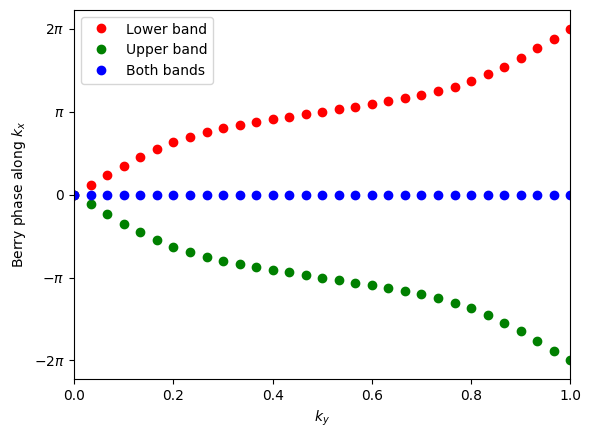

In [6]:
# plot Berry phases
fig, ax = plt.subplots()
ky = np.linspace(0, 1, len(phi_1))
ax.plot(ky, phi_0, "ro", label="Lower band")
ax.plot(ky, phi_1, "go", label="Upper band")
ax.plot(ky, phi_both, "bo", label="Both bands")

ax.legend()
ax.set_xlabel(r"$k_y$")
ax.set_ylabel(r"Berry phase along $k_x$")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(-7.0, 7.0)
ax.yaxis.set_ticks([-2.0 * np.pi, -np.pi, 0.0, np.pi, 2.0 * np.pi])
ax.set_yticklabels((r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$"))

Berry flux for lower band

In [7]:
flux_a_1 = wf_array_1.berry_flux([0], plane=(0,1))
print("Sum of Berry flux for lower band in the full BZ = ", np.sum(flux_a_1))

Sum of Berry flux for lower band in the full BZ =  -6.283185307179586
